# Statistics

In the statistics module we analyze data for different responses and at different spectral peak locations.
We use Python package scipy in this module.


## T-Test
T-test checks for difference in the mean between two sample from different responses. We assume the data is independent and follows the normality assumption.
Let $x_1, \ldots, x_n$ and $y_1,\ldots ,y_m$ be the two samples and we test whether the means are equal. The null hypothesis states means $\mu_1$ and $\mu_2$ are equal
and the alternative hypothesis states they are not equal. If the p-value is lower than the chosen significance level, we can reject the null hypothesis, i.e. the samples do not have the same means.


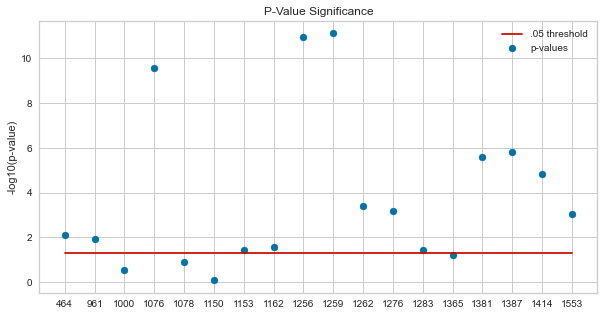

In [1]:
        import modules.adapml_data as adapml_data
        import modules.adapml_classification as adapml_classification
        import modules.adapml_clustering as adapml_clustering
        import modules.adapml_chemometrics as adapml_chemometrics
        import modules.adapml_statistics as adapml_statistics
        import modules.adapml_regression as adapml_regression
        import numpy as np
        import modules.loadTestData as load_data
        import sklearn.preprocessing as pre
        from sklearn.cross_decomposition import PLSRegression as PLS
        from matplotlib import pyplot as plt
        from sklearn import cluster as clst
        from scipy.cluster.hierarchy import dendrogram

        import os

        reldir = os.getcwd()
        path_to_data = os.path.join(reldir, '..', 'data', 'SCLC_study_output_filtered_2.csv')

        data = adapml_data.DataImport(path_to_data)

        response1D = data.resp
        #response1D = adapml_data.DataImport.getResponse(path_to_data)
        response2D = adapml_data.DataImport.getDummyResponse(response1D)

        variables = data.getVariableNames()
        samples = data.getSampleNames()

        t_test = adapml_statistics.Statistics(data.data, 'anova', response1D)
        t_test.plot_logp_values(variables)


        

## Volcano Plot

Volcano plot is a scatter plot which demonstrates magnitude between the responses and t-test significance of the data. We can choose a significance level and fold change limit
to specify the rectangle of interest.


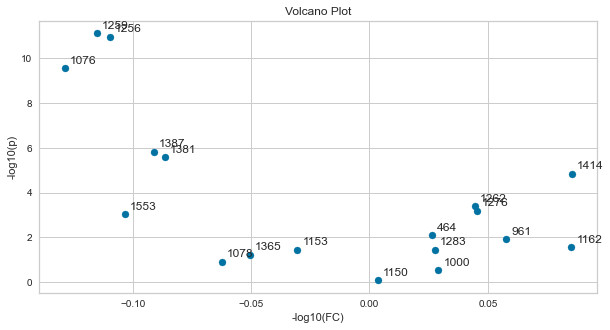

In [2]:
t_test.plot_volcano_t(variables)


# Dimension-Reduction

Dimension-reduction methods are used to condense high dimensional data down to dimensions which provide the most information. We have implemented the principal component analysis (PCA). It performs a change of basis and the new basis is chosen, such that the i-th principal component is orthogonal to the first i-1 principal components and the direction maximizes the variance of the projected data.
We use the Python library sklearn.



## Principal Component Analysis
The principal component analysis (PCA) is one of the methods for dimension-reduction. It performs a change of basis and the new basis is chosen, such that the i-th principal component is orthogonal to the first i-1 principal components and the direction maximizes the variance of the projected data. Instead of considering all the dimensions,
we pick the necessary number of principal components.


PCA Projections
Projections of data into latent space.
Data is colored by response


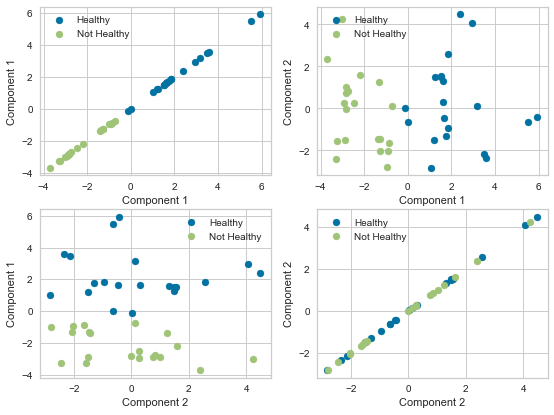

In [3]:
data.normalizeData("autoscale")

pca = adapml_chemometrics.Chemometrics(data.data, "pca", response1D)

print("PCA Projections");pca.plotProjectionScatterMultiClass(2, labels=["Healthy", "Not Healthy"])



## Linear Discriminant Analysis
Linear discriminant analysis is a classifier with a linear decision boundary. We assume normality and fit conditional densities $p(x\; | \; y=0)$ and $p(x \; | \; y=1)$ with mean and covariance parameters $(\mu_0,\sigma_0)$ and $(\mu_1,\sigma_1)$, where $x,\mu_0$ and $\mu_1$ are vectors.
Dimensionality-reduction is done by projecting the input to the most discriminative directions.


LDA Projections
Projections of data into latent space.
Data is colored by response


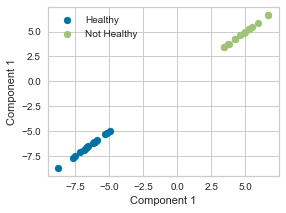

In [4]:
lda = adapml_chemometrics.Chemometrics(data.data, "lda", response1D) # Also Predicts

print("LDA Projections");lda.plotProjectionScatterMultiClass(1, labels=["Healthy", "Not Healthy"])



# Clustering

In this module we use various different clustering methods on spectra. Clustering is done with scipy and sklearn libraries.



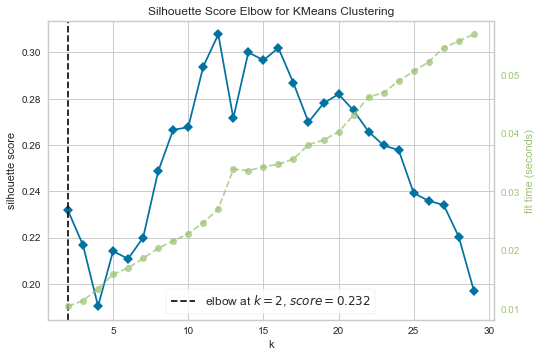

In [5]:
silhouette = adapml_clustering.Clustering(data.data, 'silhouette', 3)
nr_clusters = silhouette.clustnr


## K-Means Clustering

K-means clustering aims to partition the data into $k$ sets and to minimize the Euclidian within-cluster sum of squares (WCSS)
$$WCSS=\sum_{i=1}^{k}\sum_{x_j\in C_i}\|x_j-\mu_i\|_2^2$$
where $x_1,\ldots,x_n$ is the data and $\mu_i$ is the centroid of $C_i$ cluster. It is solved by either Lloyd’s or Elkan’s algorithm and we use sklearn module in Python.


In [6]:
kmeans_cluster = adapml_clustering.Clustering(data.data, 'kmeans', nr_clusters)
kmeans_cluster.getClusterResults(samples)


         Cluster 1        Cluster 2
0      SCLC_86M1_2     NSCLC_A549_1
1      SCLC_86M1_1    NSCLC_H1703_2
2      SCLC_16HV_1    NSCLC_H1703_1
3      SCLC_16HV_2     NSCLC_A549_2
4     SCLC_DMS79_1    NSCLC_H1437_1
5     SCLC_DMS79_2    NSCLC_H2228_1
6      SCLC_H187_2    NSCLC_H2228_2
7      SCLC_H187_1    NSCLC_H1437_2
8      SCLC_H209_1    NSCLC_H3122_1
9      SCLC_H524_1     NSCLC_H322_2
10     SCLC_H209_2     NSCLC_H322_1
11     SCLC_H524_2     NSCLC_H358_2
12      SCLC_H69_1    NSCLC_H3122_2
13      SCLC_H82_1     NSCLC_H522_1
14      SCLC_H82_2     NSCLC_H522_2
15      SCLC_H69_2  NSCLC_HCC4006_1
16     SCLC_N417_2     NSCLC_H358_1
17     SCLC_N417_1      NSCLC_PC9_1
18  SCLC_SW210-5_1      NSCLC_PC9_2
19  SCLC_SW210_5_2  NSCLC_HCC4006_2


## BIRCH Clustering



In [7]:
birch_cluster = adapml_clustering.Clustering(data.data, 'birch', nr_clusters)
birch_cluster.getClusterResults(samples)


          Cluster 1       Cluster 2
0      NSCLC_A549_1     SCLC_86M1_2
1     NSCLC_H1703_2     SCLC_86M1_1
2     NSCLC_H1703_1     SCLC_16HV_1
3      NSCLC_A549_2     SCLC_16HV_2
4     NSCLC_H1437_1    SCLC_DMS79_1
5     NSCLC_H2228_1    SCLC_DMS79_2
6     NSCLC_H2228_2     SCLC_H187_2
7     NSCLC_H1437_2     SCLC_H187_1
8     NSCLC_H3122_1     SCLC_H209_1
9      NSCLC_H322_2     SCLC_H524_1
10     NSCLC_H322_1     SCLC_H209_2
11     NSCLC_H358_2     SCLC_H524_2
12    NSCLC_H3122_2      SCLC_H69_1
13     NSCLC_H522_1      SCLC_H82_1
14     NSCLC_H522_2      SCLC_H82_2
15  NSCLC_HCC4006_1      SCLC_H69_2
16     NSCLC_H358_1     SCLC_N417_2
17      NSCLC_PC9_1     SCLC_N417_1
18      NSCLC_PC9_2  SCLC_SW210-5_1
19  NSCLC_HCC4006_2  SCLC_SW210_5_2


## DBSCAN Clustering



In [8]:
dbscan_cluster = adapml_clustering.Clustering(data.data, 'dbscan', nr_clusters)
dbscan_cluster.getClusterResults(samples)


Empty DataFrame
Columns: [Cluster 1, Cluster 2]
Index: []


## Hierarchical Clustering

Hierarchical clustering builds hierarchies of clusters based on a chosen metric and a linkage scheme.
We used cosine distance and average linkage scheme.


          Cluster 1       Cluster 2
0      NSCLC_A549_1     SCLC_86M1_2
1     NSCLC_H1703_2     SCLC_86M1_1
2     NSCLC_H1703_1     SCLC_16HV_1
3      NSCLC_A549_2     SCLC_16HV_2
4     NSCLC_H1437_1    SCLC_DMS79_1
5     NSCLC_H2228_1    SCLC_DMS79_2
6     NSCLC_H2228_2     SCLC_H187_2
7     NSCLC_H1437_2     SCLC_H187_1
8     NSCLC_H3122_1     SCLC_H209_1
9      NSCLC_H322_2     SCLC_H524_1
10     NSCLC_H322_1     SCLC_H209_2
11     NSCLC_H358_2     SCLC_H524_2
12    NSCLC_H3122_2      SCLC_H69_1
13     NSCLC_H522_1      SCLC_H82_1
14     NSCLC_H522_2      SCLC_H82_2
15  NSCLC_HCC4006_1      SCLC_H69_2
16     NSCLC_H358_1     SCLC_N417_2
17      NSCLC_PC9_1     SCLC_N417_1
18      NSCLC_PC9_2  SCLC_SW210-5_1
19  NSCLC_HCC4006_2  SCLC_SW210_5_2


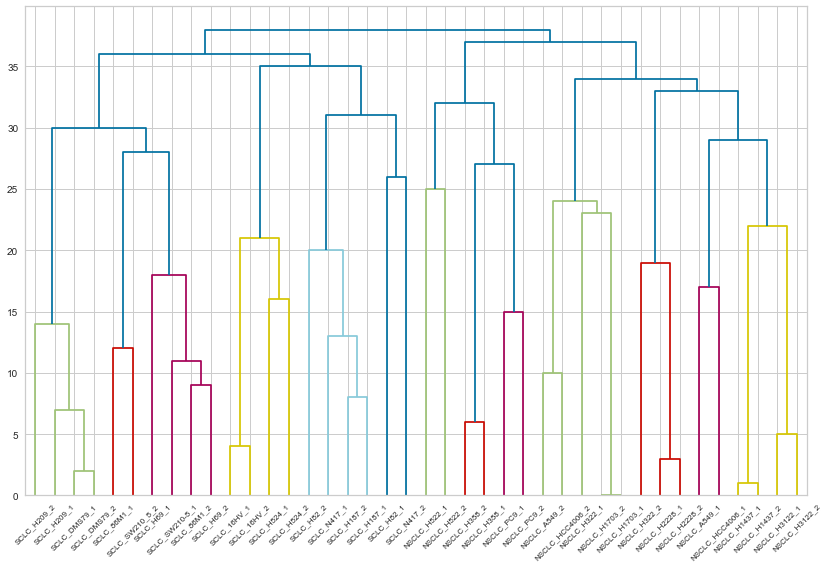

In [9]:
hierarchical_cluster = adapml_clustering.Clustering(data.data, 'hierarchical', nr_clusters)
hierarchical_cluster.getClusterResults(samples)
hierarchical_cluster.plot_dendrogram(samples)


# Classification

Classification methods aim to classify the response of samples. The given data is separated into
a training set and a testing set. The model parameters are found from the training set and the testing set is used to quantify the model accuracy.
The methods are from sklearn package.


## Partial Least Squares-Discriminant Analysis



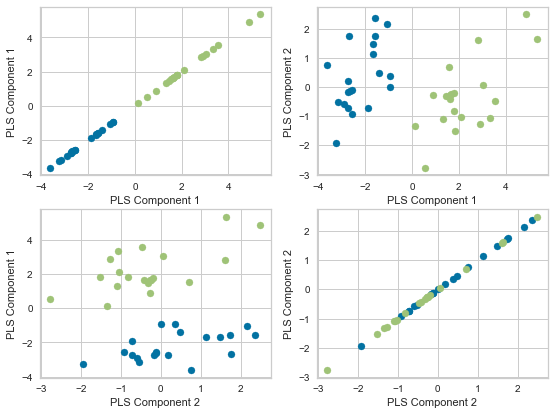

In [10]:
def plotProjectionScatterMultiClass(pc, resp, num_var):
    plt.figure(figsize=(24, 18))

    for i in range(num_var):
        for j in range(num_var):
            plt.subplot(5,5,5*(i) + j + 1)
            for c in range(resp.shape[1]):
                inx = np.where(resp[:,c] == 1)[0]
                tmp = pc[inx,:]
                pc1 = tmp[:,i]
                pc2 = tmp[:,j]
                plt.scatter(pc1, pc2)
            plt.xlabel("PLS Component "+str(i+1))
            plt.ylabel("PLS Component "+str(j+1))

    plt.show()

data = load_data.loadDataPandas(path_to_data)
d = data.to_numpy()
var_index = data.columns.values.tolist()

resp = load_data.getResponseMatrix2D()

norm_trans = pre.StandardScaler().fit(d)
data_norm = norm_trans.transform(d)
#data_norm, norm_trans = pre.mean_center(d)
#In-built preprocessing method - TBD

pls = PLS().fit(data_norm, resp)
pls_trans = pls.transform(data_norm)

plotProjectionScatterMultiClass(pls_trans, resp, 2)



## Support Vector Machines

Classification via SVM is done by fitting a linear plane to the latent space but only considering a subset of inputs in the fitting process.
The quantity $R^2$ measures what percentage of variation was explained by the model in the training set. The quantity $Q^2$ shows the same measurement but for the test data set.


In [11]:
data = adapml_data.DataImport(path_to_data)
svm = adapml_classification.Classification(data.data, response1D, 'svm', .75, kfolds=3)

adapml_classification.print_model_stats(svm, "SVM")



SVM Validated Parameters:  {'kernel': 'linear', 'shrinking': True}
SVM: R^2=1.0 Q^2=1.0


## Random Forest

Random forests is an ensemble classification method.
It works by constructing multiple decision trees based on the training data and then choosing the class, chosen by the most number of decision trees.
The quantity $R^2$ measures what percentage of variation was explained by the model in the training set. The quantity $Q^2$ shows the same measurement but for the test data set.


In [12]:
data = adapml_data.DataImport(path_to_data)
rnf = adapml_classification.Classification(data.data, response1D, 'randomforest', .75, kfolds=3)

adapml_classification.print_model_stats(rnf, "RF")


Random Forest Validated Parameters:  {'criterion': 'gini', 'n_estimators': 50}
RF: R^2=1.0 Q^2=1.0


## Logistic Regression

Logistic regression uses a logistic function to model a binary dependent variable. The confusion matrix displays the accuracy of the model for the test data set.
We use the packages sklearn for the logistic regression and seaborn for the confusion matrix.


Accuracy: 1.0


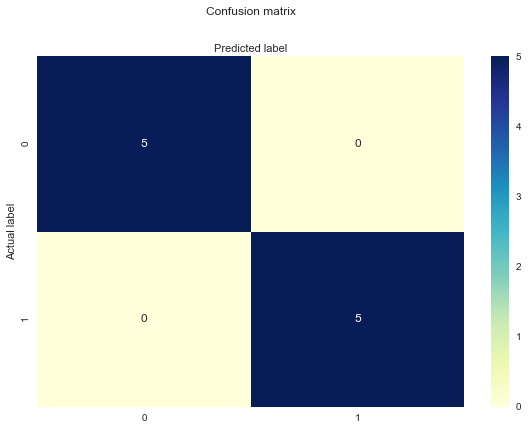

In [13]:
data = adapml_data.DataImport(path_to_data)

logistic = adapml_classification.Classification(data.data, response1D, 'logistic', .25)
print(logistic)


# Regression



## Linear Regression



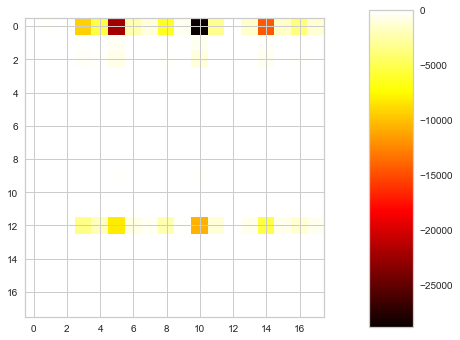

In [14]:
reg = adapml_regression.Regression(data.data, "linear")
reg.linear
